# NOAA Coral Reef Watch's CoralTemp: Dataset Overview and Use Case Example
## EDS 220, Fall 2021

The following Jupyter notebook demonstrates key features and use case examples for the NOAA Coral Reef Watch CoralTemp dataset.

## NOAA Coral Reef Watch (CRW) CoralTemp
### Using the CoralTemp Dataset for Climate Resilient Coral Modeling (CRCM)

#### Authors

- Alex Clippinger, Bren School of Environmental Science & Management, (alexclippinger@ucsb.edu) 
- Charles Hendrickson, Bren School of Environmental Science & Management, (c_d_h@ucsb.edu)
- Connor Flynn, Bren School of Environmental Science & Management, (connorflynn@ucsb.edu)

## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Purpose

This notebook was created to provide an introduction to the NOAA Coral Reef Watch CoralTemp data products, specifically the 5-km sea surface temperature dataset, although we will also introduce the sea surface temperature anomaly and degree heating week datasets. We will demonstrate the capability of these data products to analyze heat resilient coral in the face of warming sea surface temperatures.

<a id='overview'></a> 
### Dataset Description

#### Creators of the dataset

The CoralTemp data products are maintained by NOAA's Coral Reef Watch Organization (CRW). CRW was established in 2000 to address the need to enhance coral reef resilience. Since then, the organization has accurately monitored and predicted all major bleaching events since 1997. The CoralTemp dataset is the foundation of Coral Reef Watch's ability to fulfill the mission of protecting coral reefs.

#### Major characteristics

CoralTemp is a global sea surface temperature data product used primarily for coral bleaching monitoring. The dataset contains many data products based on 5 geostationary and 3 polar-orbiting satellites. These products include the main sea surface temperature data set (which is the basis for the other products), degree heating week (DHW), bleaching alert areas, coral bleaching hotspots, sea ice fraction, and sea surface temperature anomaly.

- Description of data products:
  - SST: Nighttime sea surface temperature (celcius), calibrated to 0.2 meters depth, across the entire globe.
  - SST Anomaly: A comparison of current sea surface temperature with the long term mean SST at a given location during a certain period of time
    - The temperature anomalies range from -5.0 to +5.0 degrees Celsius (°C). Data and images are updated daily
  - Degree Heating Week - The DHW shows how much heat stress (SST above the bleaching threshold) has accumulated in an area.
    - The units for DHW are "degree Celsius-weeks" (or °C-weeks), combining the intensity and duration of the oceanic heat stress into a single number.
  - Bleaching Alert Area
    - 5 levels (no stress, bleaching warning, bleaching watch, alert level 1, alert level 2)
    - Produced based on DHW
    
We will focus on the primary sea surface temperature (SST) dataset for the remainder of the notebook. The key details of the SST dataset include: 
- Spatial Resolution: 5km gridded cells.
- Spatial Coverage: The dataset has a complete spatial coverage of the ocean. 
- Temporal Resolution: 1985-04-01 to present. 

#### File format(s)

Data can be downloaded as CSV, netCDF, geotiff, and other common file formats with some unique limitations. For example, geotiff downloads can only contain a single day of data. CSV downloads on the other hand can contain multiple days of observations in a single file. The data is produced daily in near real-time, with an approximately 60 hour delay in availability from the present.

A detailed list of output formats can be found in the data product documentation here: https://coastwatch.pfeg.noaa.gov/erddap/griddap/documentation.html

#### Source/Archive

The data can be accessed via a REST API data access form. Here is the URL for manually querying the data: https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW.html

This data source is maintained by the creator of the dataset, NOAA, indicating that this should be a reliable source of data for the foreseeable future.

#### Known issues with data quality

NOAA satellite data sets have specified processing levels ranging from 0 to 4, with 0 indicating unprocessed telemetry data as received and 4 indicating data products that are model output or results from analysis derived from multiple measurements. The CoralTemp SST product is derived from three level-4 satellite datasets:
  - NOAA/NESDIS operational near-real-time daily global 5-km geostationary-polar-orbiting (geo-polar) blended night-only SST analysis
  - NOAA/NESDIS 2002-2016 reprocessed daily global 5-km geo-polar blended night-only SST analysis
  - United Kingdom Met Office 1985-2002 daily global 5-km night-only SST reanalysis of Operational SST and Sea Ice Analysis (OSTIA)

Thus, the data is gridded and gap-filled according to NOAA’s highest processing level. Therefore, there are no significant gaps in data, spatially or temporally, and all outliers and spikes are likely reflective of real world occurrences.

Source: https://coralreefwatch.noaa.gov/product/5km/tutorial/crw05a_sst_product.php

However, there are limitations associated with using the dataset, which has a 5-km grid resolution and once-daily measurements. Although sufficient for numerous useful applications, this spatial scale may not be high enough for certain applications, such as drawing conclusions on variation in sea surface temperature within a small area such as a coral reef. Ocean sea surface temperature varies continuously across the surface, not in gridded cells, which could introduce an inherent bias in our analysis. In addition, ocean temperature varies consistently over time, while the dataset only contains a single nighttime reading per day.

<a id='io'></a> 
### Dataset Input/Output 

The following code chunks demonstrate how to read in CoralTemp data for analysis.

#### Import all necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Set parameters

In [2]:
# Set parameters used in data access query
start_date = '2019-01-01T12:00:00Z'
end_date = '2019-12-31T12:00:00Z'
product_code = 'SST'
output_format = 'csv'

# Bounding box for our area of interest
ymax = '19.800'
ymin = '19.750'
xmin = '-155.099'
xmax = '-155.050'

#### Load CoralTemp data

In [3]:
# Query to pull data from Coral Reef Watch data products
base_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW.'
query = base_url+output_format+'?CRW_'+product_code+'%5B('+start_date+'):1:('+end_date+')%5D%5B('+ymax+'):1:('+ymin+')%5D%5B('+xmin+'):1:('+xmax+')%5D'

# Read csv
df = pd.read_csv(query, 
                 names = ["date", "latitude", "longitude", "sst_c"], 
                 skiprows = 2)

# Remove timestamp and set date as index
df["date"] = pd.to_datetime(df["date"])

# Show preview of dataset
df.head()

,date,latitude,longitude,sst_c
0,2019-01-01 12:00:00+00:00,19.775,-155.075,24.86
1,2019-01-02 12:00:00+00:00,19.775,-155.075,24.97
2,2019-01-03 12:00:00+00:00,19.775,-155.075,24.94
3,2019-01-04 12:00:00+00:00,19.775,-155.075,24.92
4,2019-01-05 12:00:00+00:00,19.775,-155.075,24.77


<a id='display'></a> 
### Metadata Display and Basic Visualization

#### Metadata

A complete list of variables and attributes, as well as their descriptions, are provided on the Data Access Form used to download CoralTemp data products. Additionally, information like the publisher name, email, and institution is provided, as well as an overall summary of the dataset, specific products, and output file formats. Information about key variables such as time, latitude, longitude, and their associated mask is extensively documented in the metadata. 
  - Data Access Form/output format documentation: https://coastwatch.pfeg.noaa.gov/erddap/griddap/documentation.html
  - Detailed Metadata on all CoralTemp data products: https://coastwatch.pfeg.noaa.gov/erddap/info/NOAA_DHW/index.html

#### Basic Visualization

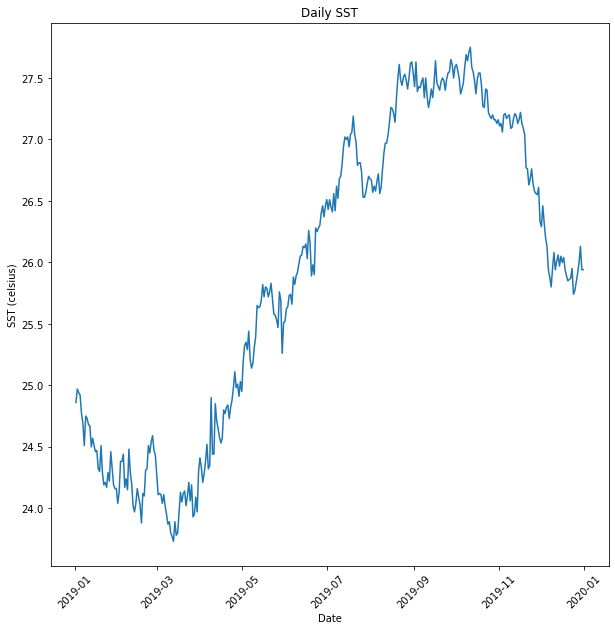

In [4]:
# Create basic time-series
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(df["date"],
        df["sst_c"])

ax.set(xlabel = "Date",
       ylabel = "SST (celsius)",
       title = "Daily SST")
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. For example, the Week 7 SST exercise might discuss how the state of the ENSO system can be important for seasonal weather forecasts/coral bleaching outlooks, then mention the typical diagnostics associated with ENSO (i.e. identification of El Nino/La Nina events).

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, we are doing El Nino/La Nina composites in class; a natural extension might be to look at individual events to see what their particular impacts were. Or if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


#### Summary

Our team will demonstrate the ability to use the CoralTemp dataset to analyze heat resilient coral and the effects of rising sea surface temperatures on coral bleaching. Using three different SST warming scenarios (0.4 degree celsius increase by 2025, 0.8 degree celsius increase by 2025, and 1.1 degree celsius increase by 2025) we will explore the resilience of heat tolerant coral (specifically coral with a symbiont algae that increases it’s bleaching threshold by 1.5 degree celsius compared to non heat tolerant coral). We are focusing on a gridded cell containing a reef known to have heat tolerant coral, located near Hilo, Hawai'i. 

#### Walkthrough

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import statsmodels.api as sm
import itertools
import datetime

In [6]:
## Import our SST data

# create empty dataframe
sst_df = pd.DataFrame()

# append all data into single dataframe
for f in glob.glob(r"data/*.csv"):
    df = pd.read_csv(f,
                     usecols = [0,3],
                     names = ["date", "sst_c"], 
                     skiprows = 2)
    sst_df = sst_df.append(df, ignore_index = True)

# change date column from str to datetime and make it the index
sst_df['date'] = pd.to_datetime(sst_df['date'])
sst_df = sst_df.set_index(['date'])

# set datetime frequency to days
sst_df = sst_df.asfreq('d')

sst_df

,sst_c
date,
1985-11-09 12:00:00+00:00,25.45
1985-11-10 12:00:00+00:00,25.56
1985-11-11 12:00:00+00:00,25.70
1985-11-12 12:00:00+00:00,25.87
1985-11-13 12:00:00+00:00,26.02
...,...
2021-11-05 12:00:00+00:00,25.77
2021-11-06 12:00:00+00:00,25.79
2021-11-07 12:00:00+00:00,25.67


In [15]:
## Create a dataframe of "forecasted" SST

# Create "training" dataset - in this simple example, we are just using the year prior
sst_df_training = sst_df['2020-11-10 12:00:00+00:00':'2021-11-09 12:00:00+00:00']

# Create empty dataframe
sst_df_forecast = pd.DataFrame(columns = ['date', 'sst_c'])

# Add date range to date column
sst_df_forecast['date'] = pd.date_range(start = '2021-11-10 12:00:00+00:00', end = '2030-11-09 12:00:00+00:00')

# change date column from str to datetime and make it the index
sst_df_forecast['date'] = pd.to_datetime(sst_df_forecast['date'])
sst_df_forecast = sst_df_forecast.set_index(['date'])

# set datetime frequency to days
sst_df_forecast = sst_df_forecast.asfreq('d')

# remove leap days
sst_df_forecast = sst_df_forecast[~((sst_df_forecast.index.month == 2) & (sst_df_forecast.index.day == 29))]

# Straightforwardly forecast SST warming
sst_df_forecast['2021-11-10 12:00:00+00:00':'2022-11-09 12:00:00+00:00'] = sst_df_training + 0.2
sst_df_forecast['2022-11-10 12:00:00+00:00':'2023-11-09 12:00:00+00:00'] = sst_df_training + 0.4
sst_df_forecast['2023-11-10 12:00:00+00:00':'2024-11-09 12:00:00+00:00'] = sst_df_training + 0.6
sst_df_forecast['2024-11-10 12:00:00+00:00':'2025-11-09 12:00:00+00:00'] = sst_df_training + 0.8
sst_df_forecast['2025-11-10 12:00:00+00:00':'2026-11-09 12:00:00+00:00'] = sst_df_training + 1.0
sst_df_forecast['2026-11-10 12:00:00+00:00':'2027-11-09 12:00:00+00:00'] = sst_df_training + 1.2
sst_df_forecast['2027-11-10 12:00:00+00:00':'2028-11-09 12:00:00+00:00'] = sst_df_training + 1.4
sst_df_forecast['2028-11-10 12:00:00+00:00':'2029-11-09 12:00:00+00:00'] = sst_df_training + 1.6
sst_df_forecast['2029-11-10 12:00:00+00:00':'2030-11-09 12:00:00+00:00'] = sst_df_training + 1.8

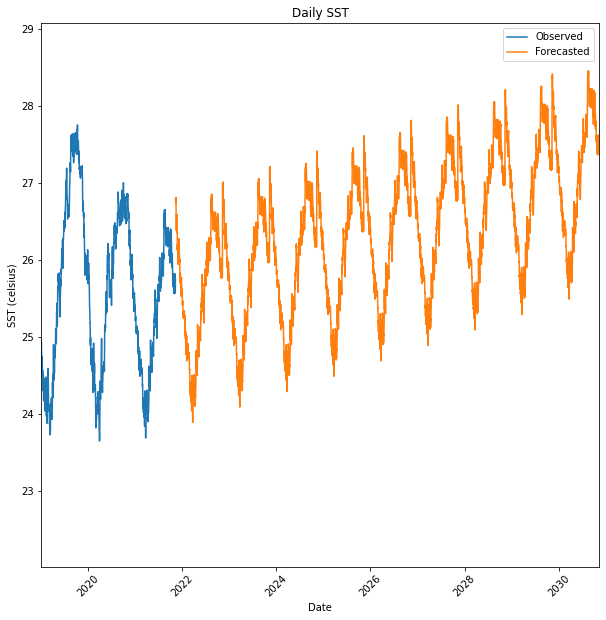

In [16]:
## Create time-series of forecasted SST values

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(sst_df.index,
        sst_df["sst_c"],
        label = "Observed")

ax.plot(sst_df_forecast.index,
        sst_df_forecast["sst_c"],
        label = "Forecasted")

ax.legend()

ax.set(xlabel = "Date",
       ylabel = "SST (celsius)",
       title = "Daily SST")

ax.set_xlim(left = datetime.date(2019, 1, 1), right = datetime.date(2030, 11, 9))

plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

In [13]:
## Calculate our bleaching thresholds

# Base year data
df = sst_df['2019-01-01T12:00:00Z':'2019-12-31T12:00:00Z']
df = df.reset_index()

# set parameters used in query
start_date = '2019-01-01T12:00:00Z'
end_date = '2019-12-31T12:00:00Z'
product_code = 'SSTANOMALY'
output_format = 'csv'

ymax = '19.800'
ymin = '19.750'
xmin = '-155.099'
xmax = '-155.050'

# query to pull data from Coral Reef Watch data products
query = r'https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW.'+output_format+'?CRW_'+product_code+'%5B('+start_date+'):1:('+end_date+')%5D%5B('+ymax+'):1:('+ymin+')%5D%5B('+xmin+'):1:('+xmax+')%5D'

# read csv
df_anomaly = pd.read_csv(query, 
                         usecols = [0,3],
                         names = ["date", "sst_anomaly"], 
                         skiprows = 2)

# remove timestamp
df_anomaly["date"] = pd.to_datetime(df_anomaly["date"])

# calculate 28 year mean based on anomaly dataset
df_anomaly["monthly_mean_sst"] = df['sst_c'] - df_anomaly['sst_anomaly']

# find max monthly mean
df_month = df_anomaly.groupby(df_anomaly["date"].dt.strftime('%B'))['monthly_mean_sst'].mean().sort_values()

# Set bleaching thresholds
bleaching_threshold = df_month.max() + 1
bleaching_threshold_ht = bleaching_threshold + 1.5

print("Normal bleaching threshold: " + str(bleaching_threshold.round(2)))
print("Heat tolerant bleaching threshold: " + str(bleaching_threshold_ht.round(2)))

Normal bleaching threshold: 27.62
Heat tolerant bleaching threshold: 29.12


In [14]:
## Calculate degree heating week

date
February     24.068929
April        24.085000
March        24.089355
January      24.360645
May          24.626774
December     25.038710
June         25.280667
July         25.920000
November     26.006667
October      26.414516
August       26.417742
September    26.619333
Name: monthly_mean_sst, dtype: float64

In [11]:
## Plot degree heating weeks/fill in above SST threshold

In [12]:
## Summarize

<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

List relevant references. Here are some additional resources on creating professional, shareable notebooks you may find useful:

1. Notebook sharing guidelines from reproducible-science-curriculum: https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/
2. Guide for developing shareable notebooks by Kevin Coakley, SDSC: https://github.com/kevincoakley/sharing-jupyter-notebooks/raw/master/Jupyter-Notebooks-Sharing-Recommendations.pdf
3. Guide for sharing notebooks by Andrea Zonca, SDSC: https://zonca.dev/2020/09/how-to-share-jupyter-notebooks.html
4. Jupyter Notebook Best Practices: https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69
5. Introduction to Jupyter templates nbextension: https://towardsdatascience.com/stop-copy-pasting-notebooks-embrace-jupyter-templates-6bd7b6c00b94  
    5.1. Table of Contents (Toc2) readthedocs: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html  
    5.2. Steps to install toc2: https://stackoverflow.com/questions/23435723/installing-ipython-notebook-table-of-contents
6. Rule A, Birmingham A, Zuniga C, Altintas I, Huang SC, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLOS Computational Biology 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007. Supplementary materials: example notebooks (https://github.com/jupyter-guide/ten-rules-jupyter) and tutorial (https://github.com/ISMB-ECCB-2019-Tutorial-AM4/reproducible-computational-workflows)
7. Languages supported by Jupyter kernels: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
8. EarthCube notebooks presented at EC Annual Meeting 2020: https://www.earthcube.org/notebooks
9. Manage your Python Virtual Environment with Conda: https://towardsdatascience.com/manage-your-python-virtual-environment-with-conda-a0d2934d5195
10. Venv - Creation of Virtual Environments: https://docs.python.org/3/library/venv.html